# Assignment 2

In [15]:
import numpy as np


(a)
    Using the random.normalfunction, create a vector, x, containing 100 observations drawn from a normal distribution with mean of 0.0 variance of 1. The vector xrepresents a feature X.

In [16]:
np.random.seed(111)
x = np.random.normal(loc=0, scale=1, size=(100,1))
x = np.sort(x, axis=0)

(b)
    Using the random.normalfunction, create a vector, eps, containing 100 observations drawn from a normal distribution with mean of 0.0 and variance of 0.25. 

In [17]:
np.random.seed(111)
eps = np.random.normal(loc=0, scale=0.25, size=(100,1))

(c)
    Using xand eps, generate a vector y according to the model:Y= −1 + 0.5X+  Ɛ. What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [18]:
beta0 = -1
beta1 = 0.5
y = beta0 + beta1 * x + eps
print(f'Value for β0 = {beta0}')
print(f'Value for β1 = {beta1}')
print(f'Length of the vector y = {y.shape[0]}')

Value for β0 = -1
Value for β1 = 0.5
Length of the vector y = 100


(d)
    Create a scatterplot displaying the relationship between xand y. Comment on what you observe. 
    For training regression models use the sklearnmodulelinear_model.

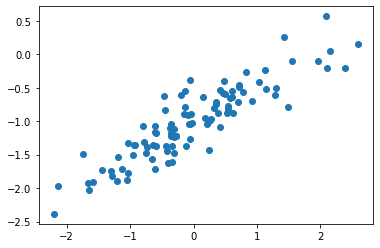

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

there is a very obvious correlation between x and y that seems to be linear.

(e)
    Fit a least squares linear model LinearRegression()from the module linear_model to predict y using x. Comment on the model obtained. How do the estimations of β̂0 and β̂1 compare to β0 and β1 themselves? Display the least squares line on the scatterplot obtained in (d).Compute R2statistics (using function r2_score  from the sklearn.metricsmodule).

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(x,y)
lin_model_coef = lin_model.coef_
lin_model_inter = lin_model.intercept_
print(f'the trained model has the following intercept: {lin_model_inter}')
print(f'the trained model has the following coefficients: {lin_model_coef}')

print(f'the difference between the original intercept and the model intercept is {beta0-lin_model_inter}')
print(f'the difference between the original coeff beta1 and the model intercept is {beta1-lin_model_coef}')
y_pred = lin_model.predict(x)

the trained model has the following intercept: [-1.00288518]
the trained model has the following coefficients: [[0.50629088]]
the difference between the original intercept and the model intercept is [0.00288518]
the difference between the original coeff beta1 and the model intercept is [[-0.00629088]]


The model intercept (β̂0) and the actual value for β0 are identical. However, there is a difference for the β̂1 coefficient. T

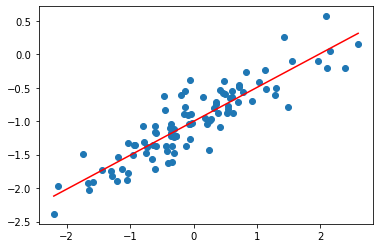

In [21]:
plt.scatter(x,y)
plt.plot(x,y_pred, 'r-')

At least from a visual point of view the model seems to predict y very nicely for all the given x. This is hardly suprising, as we've seen the clear linear relationship between the original x and y. 
We compute the r2_score to see if the visual impression is supported by actual numbers.

In [22]:
print(f'The r2_score for the predictions obtained from the model is: {r2_score(y, y_pred)}')

The r2_score for the predictions obtained from the model is: 0.8040708525300858


(f) 
    Now fit a polynomial regression model that predicts yusing xand x2. Display the curve of polynomial regression model on thescatterplot obtained in (d). Is there evidence thatthe quadratic term improves themodel fit? Explain your answer.

the trained model has the following intercept: [-0.97887257]
the trained model has the following coefficients: [[ 0.          0.51441344 -0.02532943]]
The r2_score for the predictions obtained from the model is: 0.8079486233073232


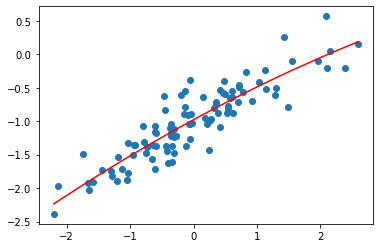

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x_poly = PolynomialFeatures().fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
poly_mod_inter = poly_model.intercept_
poly_mod_coef = poly_model.coef_
print(f'the trained model has the following intercept: {poly_mod_inter}')
print(f'the trained model has the following coefficients: {poly_mod_coef}')

y_pred_poly = poly_model.predict(x_poly)

plt.scatter(x,y)
plt.plot(x, y_pred_poly, 'r-')
print(f'The r2_score for the predictions obtained from the model is: {r2_score(y, y_pred_poly)}')

There is a slight positive change in the accuracy of the model. However, this difference is marginal, so I wouldn't say that this appproach improves the model whatsoever.
Generally speaking it would be strange to see a big effect of a polynomial regression, given that the data was generated using a lineal model. Furthermore the increase we see here is most likely due to an decrease in variance that is associated with the introduction of further parameters. This on the other hand implies that the bias of the model increases as well, so it would fit less well to additional data points drawn from the same distribution.

(g)
    Repeat (a)–(f) after modifying the data generation process insuch a way that the vector y is according to the model: y= −1 + 0.5X+ X2 + Ɛ.

Value for β0 = -1
Value for β1 = 0.5
Length of the vector y = 100


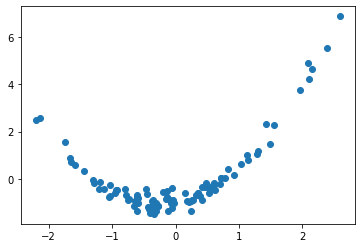

In [24]:
beta0 = -1
beta1 = 0.5
y = beta0 + beta1 * x + np.square(x)+ eps
print(f'Value for β0 = {beta0}')
print(f'Value for β1 = {beta1}')
print(f'Length of the vector y = {y.shape[0]}')

import matplotlib.pyplot as plt
plt.scatter(x,y)

the trained model has the following intercept: [-0.05487304]
the trained model has the following coefficients: [[0.82696788]]
the difference between the original intercept and the model intercept is [-0.94512696]
the difference between the original coeff beta1 and the model intercept is [[-0.32696788]]
The r2_score for the predictions obtained from the model is: 0.26552829203094597


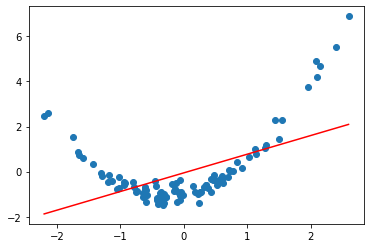

In [25]:
lin_model = LinearRegression()
lin_model.fit(x,y)
lin_model_coef = lin_model.coef_
lin_model_inter = lin_model.intercept_
print(f'the trained model has the following intercept: {lin_model_inter}')
print(f'the trained model has the following coefficients: {lin_model_coef}')

print(f'the difference between the original intercept and the model intercept is {beta0-lin_model_inter}')
print(f'the difference between the original coeff beta1 and the model intercept is {beta1-lin_model_coef}')

y_pred = lin_model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, 'r-')
print(f'The r2_score for the predictions obtained from the model is: {r2_score(y, y_pred)}')

the trained model has the following intercept: [-0.97887257]
the trained model has the following coefficients: [[0.         0.51441344 0.97467057]]
the difference between the original intercept and the model intercept is [-0.02112743]
the difference between the original coeff beta1 and the model intercept is [[ 0.5        -0.01441344 -0.47467057]]
The r2_score for the predictions obtained from the model is: 0.976228486970189


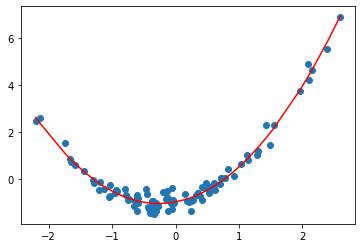

In [26]:
x_poly = PolynomialFeatures().fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
poly_mod_inter = poly_model.intercept_
poly_mod_coef = poly_model.coef_
print(f'the trained model has the following intercept: {poly_mod_inter}')
print(f'the trained model has the following coefficients: {poly_mod_coef}')

print(f'the difference between the original intercept and the model intercept is {beta0-poly_mod_inter}')
print(f'the difference between the original coeff beta1 and the model intercept is {beta1-poly_mod_coef}')

y_pred_poly = poly_model.predict(x_poly)

plt.scatter(x,y)
plt.plot(x, y_pred_poly, 'r-')
print(f'The r2_score for the predictions obtained from the model is: {r2_score(y, y_pred_poly)}')

In this case the polynomial regression perform performs significantly better than the linear regression. This is unsuprising as the model used to generate the data points is polynomial. A linear model can't predict data of this type very well, because it has too few parameters to adequately capture the nature of the data distribution.